# PUBG Explorative Data analysis

- In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.  
  

- You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.  

- File descriptions
data.csv - 151MB  

__Data fields__
  
  DBNOs - Number of enemy players knocked.  

assists - Number of enemy players this player damaged that were killed by teammates.  

boosts - Number of boost items used.  

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.  

headshotKills - Number of enemy players killed with headshots.  

heals - Number of healing items used.  

Id - Player’s Id  

killPlace - Ranking in match of number of enemy players killed.  

killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.  

killStreaks - Max number of enemy players killed in a short amount of time.  

kills - Number of enemy players killed.  

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  

matchDuration - Duration of match in seconds.  

matchId - ID to identify matches. There are no matches that are in both the training and testing set.  

matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.  

rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.  

revives - Number of times this player revived teammates.  

rideDistance - Total distance traveled in vehicles measured in meters.  

roadKills - Number of kills while in a vehicle.  

swimDistance - Total distance traveled by swimming measured in meters.  

teamKills - Number of times this player killed a teammate.  

vehicleDestroys - Number of vehicles destroyed.  

walkDistance - Total distance traveled on foot measured in meters.  

weaponsAcquired - Number of weapons picked up.  

winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.  

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  

numGroups - Number of groups we have data for in the match.  

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")

In [ ]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0.0,0.0,25.93,0.0,0.0,0.0,84.0,1437.0,0.0,0.0,0.000,1403.0,squad-fpp,31.0,29.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,151.30,1.0,1525.0,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0.0,0.0,36.71,0.0,0.0,0.0,57.0,1225.0,0.0,0.0,0.000,1971.0,squad-fpp,30.0,30.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1918.00,7.0,1516.0,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0.0,1.0,47.73,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.000,1741.0,solo-fpp,96.0,89.0,1516.0,0.0,4088.0,0.0,0.0,0.0,0.0,820.00,7.0,0.0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0.0,0.0,0.00,0.0,0.0,0.0,56.0,1286.0,0.0,0.0,0.000,1738.0,squad-fpp,28.0,27.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,38.81,0.0,1515.0,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0.0,2.0,100.00,0.0,0.0,3.0,31.0,0.0,1.0,1.0,7.737,2193.0,solo,99.0,95.0,1482.0,0.0,918.4,0.0,0.0,0.0,0.0,1721.00,5.0,0.0,0.6429


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7359 entries, 0 to 7358
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7359 non-null   int64  
 1   Id               7359 non-null   object 
 2   groupId          7359 non-null   object 
 3   matchId          7358 non-null   object 
 4   assists          7358 non-null   float64
 5   boosts           7358 non-null   float64
 6   damageDealt      7358 non-null   float64
 7   DBNOs            7358 non-null   float64
 8   headshotKills    7358 non-null   float64
 9   heals            7358 non-null   float64
 10  killPlace        7358 non-null   float64
 11  killPoints       7358 non-null   float64
 12  kills            7358 non-null   float64
 13  killStreaks      7358 non-null   float64
 14  longestKill      7358 non-null   float64
 15  matchDuration    7358 non-null   float64
 16  matchType        7358 non-null   object 
 17  maxPlace      

In [ ]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,7.359000e+03,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.00000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000
mean,2.224958e+06,0.223430,1.086301,127.799691,0.648546,0.215684,1.342348,47.914379,502.710383,0.903099,0.533569,22.65267,1576.870889,44.252378,42.759989,896.920223,0.163496,608.387236,0.002582,4.604967,0.026774,0.007883,1151.692186,3.648138,602.823322,0.470552
std,1.287153e+06,0.579037,1.702416,165.938442,1.149971,0.571003,2.692036,27.402656,628.543989,1.512303,0.698472,50.92301,258.827405,23.782372,23.239222,737.134703,0.476199,1501.872426,0.058236,28.564128,0.179000,0.092936,1189.914923,2.400501,739.356993,0.306702
min,4.400000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,250.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126199e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.00000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.700000,2.000000,0.000000,0.200000
50%,2.218633e+06,0.000000,0.000000,81.260000,0.000000,0.000000,0.000000,47.500000,0.000000,0.000000,0.000000,0.00000,1437.500000,30.000000,29.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,666.500000,3.000000,0.000000,0.461500
75%,3.340704e+06,0.000000,2.000000,181.800000,1.000000,0.000000,1.000000,72.000000,1171.750000,1.000000,1.000000,20.75500,1847.000000,49.000000,47.000000,1500.000000,0.000000,2.958750,0.000000,0.000000,0.000000,0.000000,1957.000000,5.000000,1495.000000,0.740700
max,4.446806e+06,12.000000,15.000000,2498.000000,23.000000,8.000000,33.000000,100.000000,2023.000000,26.000000,5.000000,849.60000,2214.000000,100.000000,99.000000,3033.000000,7.000000,13360.000000,2.000000,559.600000,4.000000,2.000000,9273.000000,30.000000,1914.000000,1.000000


In [ ]:
df.shape

(7359, 30)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [ ]:
df.nunique(axis=0)

Unnamed: 0         7359
Id                 7359
groupId            7344
matchId            6847
assists               9
boosts               14
damageDealt        3279
DBNOs                13
headshotKills         9
heals                30
killPlace           100
killPoints          745
kills                15
killStreaks           6
longestKill        2748
matchDuration       781
matchType            13
maxPlace             72
numGroups            80
rankPoints          511
revives               6
rideDistance       1713
roadKills             3
swimDistance        464
teamKills             5
vehicleDestroys       3
walkDistance       5350
weaponsAcquired      22
winPoints           328
winPlacePerc        903
dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            1
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

## Here we are finding the null values if any present in the columns

In [ ]:
df=df.dropna(axis=0,how='any')

In [ ]:
df=df.copy().drop(["Unnamed: 0"],axis=1)

## Here we are dropping the first column which is unnamed because we dont get any information from this

In [ ]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Now we have removed the null values 

## Detect outliers in the continous columns  
- outliers are observations that lie far away from the majority of the observations in the data set and can be represented mathematically in different ways  
- one method of defining outliers are: The points lying beyond the (third quartiel + 1.5* Inter quartile range) and below (first quartile - 1.5 * IQR)  
- The function below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule  


In [ ]:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,assists,1253
1,boosts,225
2,damageDealt,372
3,DBNOs,493
4,headshotKills,1213
5,heals,1342
6,killPlace,0
7,killPoints,0
8,kills,828
9,killStreaks,79


## We can see there are many outliers present in the different columns

## Exploratory Data Analysis  
- Exploratory data analysis is an approach to analyzing data set by summarizing their main characteristic with visualization. The EDA process is a crucial step prior to buildig a model in order to unravel various insights that later become important in developing a robust alogorithmic model  
  
### Univariate Analysis  
- It means analysis of a single variable, It's mainly describes the characteristics of the variable  


In [ ]:
print("The average person kills",df['kills'].mean(),"Enemies")
print("50% of people have",df['kills'].quantile(0.50),'kills or less')
print("75% of people have",df['kills'].quantile(0.75),'kills or less')
print("99% of people have ",df['kills'].quantile(0.99),'Kills or less')
print("maximum kills",df['kills'].max())

The average person kills 0.903098668116336 Enemies
50% of people have 0.0 kills or less
75% of people have 1.0 kills or less
99% of people have  7.0 Kills or less
maximum kills 26.0


#### The above code shows the no of enemy players that are killed by each player

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


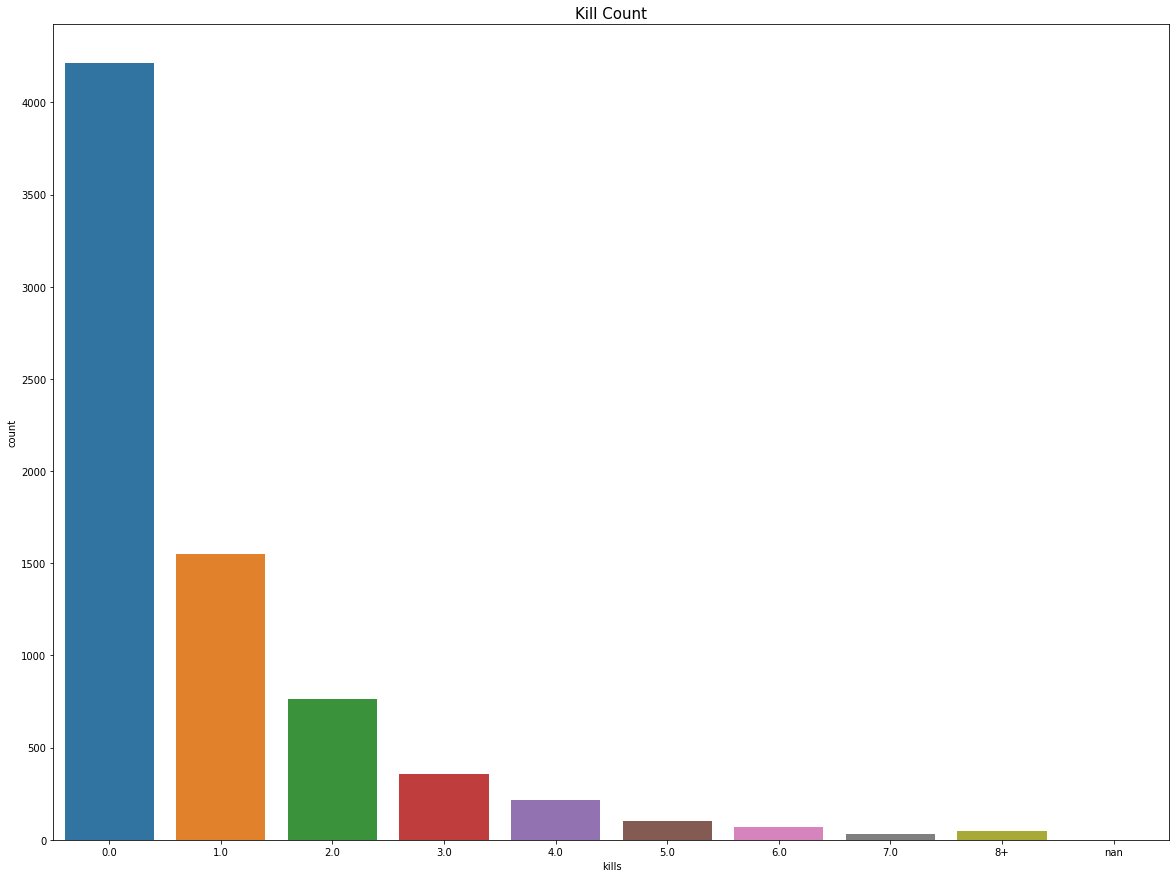

In [ ]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()


In [ ]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.00000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000
mean,0.223430,1.086301,127.799691,0.648546,0.215684,1.342348,47.914379,502.710383,0.903099,0.533569,22.65267,1576.870889,44.252378,42.759989,896.920223,0.163496,608.387236,0.002582,4.604967,0.026774,0.007883,1151.692186,3.648138,602.823322,0.470552
std,0.579037,1.702416,165.938442,1.149971,0.571003,2.692036,27.402656,628.543989,1.512303,0.698472,50.92301,258.827405,23.782372,23.239222,737.134703,0.476199,1501.872426,0.058236,28.564128,0.179000,0.092936,1189.914923,2.400501,739.356993,0.306702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,250.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.00000,1366.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.700000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,81.260000,0.000000,0.000000,0.000000,47.500000,0.000000,0.000000,0.000000,0.00000,1437.500000,30.000000,29.000000,1444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,666.500000,3.000000,0.000000,0.461500
75%,0.000000,2.000000,181.800000,1.000000,0.000000,1.000000,72.000000,1171.750000,1.000000,1.000000,20.75500,1847.000000,49.000000,47.000000,1500.000000,0.000000,2.958750,0.000000,0.000000,0.000000,0.000000,1957.000000,5.000000,1495.000000,0.740700
max,12.000000,15.000000,2498.000000,23.000000,8.000000,33.000000,100.000000,2023.000000,26.000000,5.000000,849.60000,2214.000000,100.000000,99.000000,3033.000000,7.000000,13360.000000,2.000000,559.600000,4.000000,2.000000,9273.000000,30.000000,1914.000000,1.000000


In [ ]:
print("The average person plays a duration of ",df['matchDuration'].mean())
print("50% of people plays a duration of",df['matchDuration'].quantile(0.50))
print("75% of people plays a duration of ",df['matchDuration'].quantile(0.75))
print("99% of people plays a duration of",df['matchDuration'].quantile(0.99))
print("maximum duration",df['matchDuration'].max())

The average person plays a duration of  1576.870888828486
50% of people plays a duration of 1437.5
75% of people plays a duration of  1847.0
99% of people plays a duration of 2034.0
maximum duration 2214.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


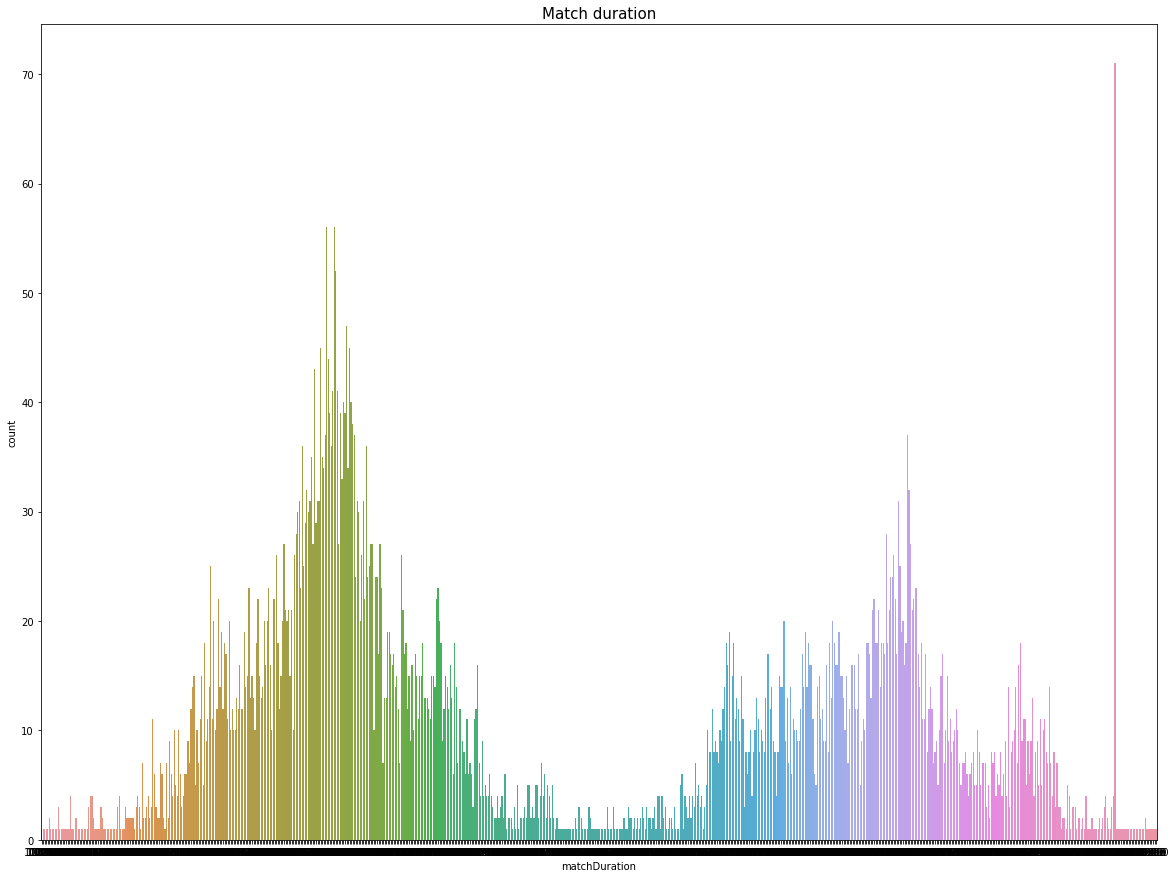

In [ ]:
data = df.copy()
data.loc[data['matchDuration'] > data['matchDuration'].quantile(0.99)] = '2100+'
plt.figure(figsize=(20,15))
sns.countplot(data['matchDuration'].astype('str').sort_values())
plt.title('Match duration',fontsize=15)
plt.show()


#### The above graphs shows the duration of each player

In [ ]:
print('The average person kills {:.4f} players in a short time'.format(df['killStreaks'].mean()))
print('50% of people have ',df['killStreaks'].quantile(0.50),' kills or less in a short time')
print('75% of people have ',df['killStreaks'].quantile(0.75),' kills or less in a short time')
print('99% of people have ',df['killStreaks'].quantile(0.99),' kills or less in a short time')
print('While the most kills in a row recorded in the data is', df['killStreaks'].max())


The average person kills 0.5336 players in a short time
50% of people have  0.0  kills or less in a short time
75% of people have  1.0  kills or less in a short time
99% of people have  3.0  kills or less in a short time
While the most kills in a row recorded in the data is 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


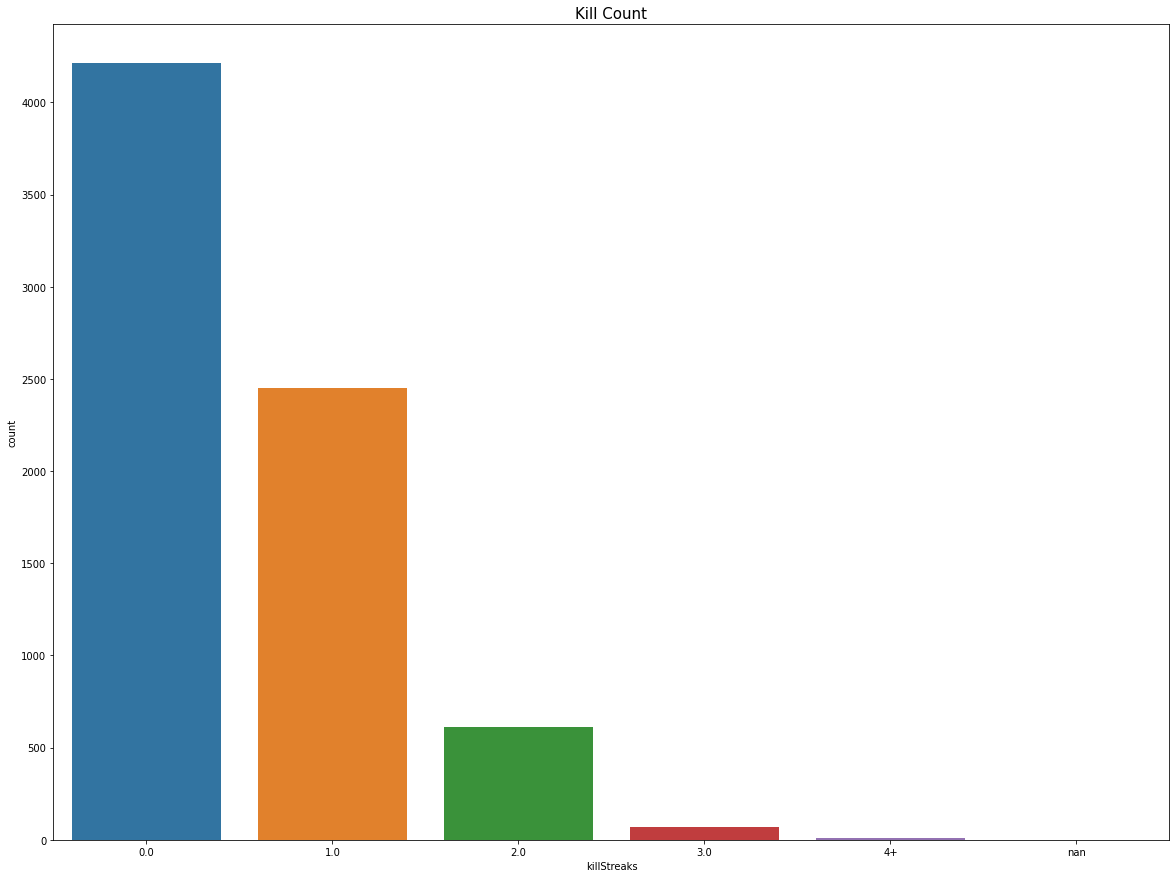

In [ ]:
data = df.copy()
data.loc[data['killStreaks'] > data['killStreaks'].quantile(0.99)] = '4+'
plt.figure(figsize=(20,15))
sns.countplot(data['killStreaks'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()


#### The above graph shows the statistical data that we found in the code in the form of a graph. This plot shows the no of players that makes 1,2,3,4+ kills

In [ ]:
df['matchType'].value_counts()

squad-fpp           2970
duo-fpp             1627
squad               1032
solo-fpp             865
duo                  511
solo                 300
normal-squad-fpp      28
normal-duo-fpp         8
crashfpp               7
normal-solo-fpp        5
crashtpp               2
flaretpp               2
normal-squad           1
Name: matchType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Match Type')

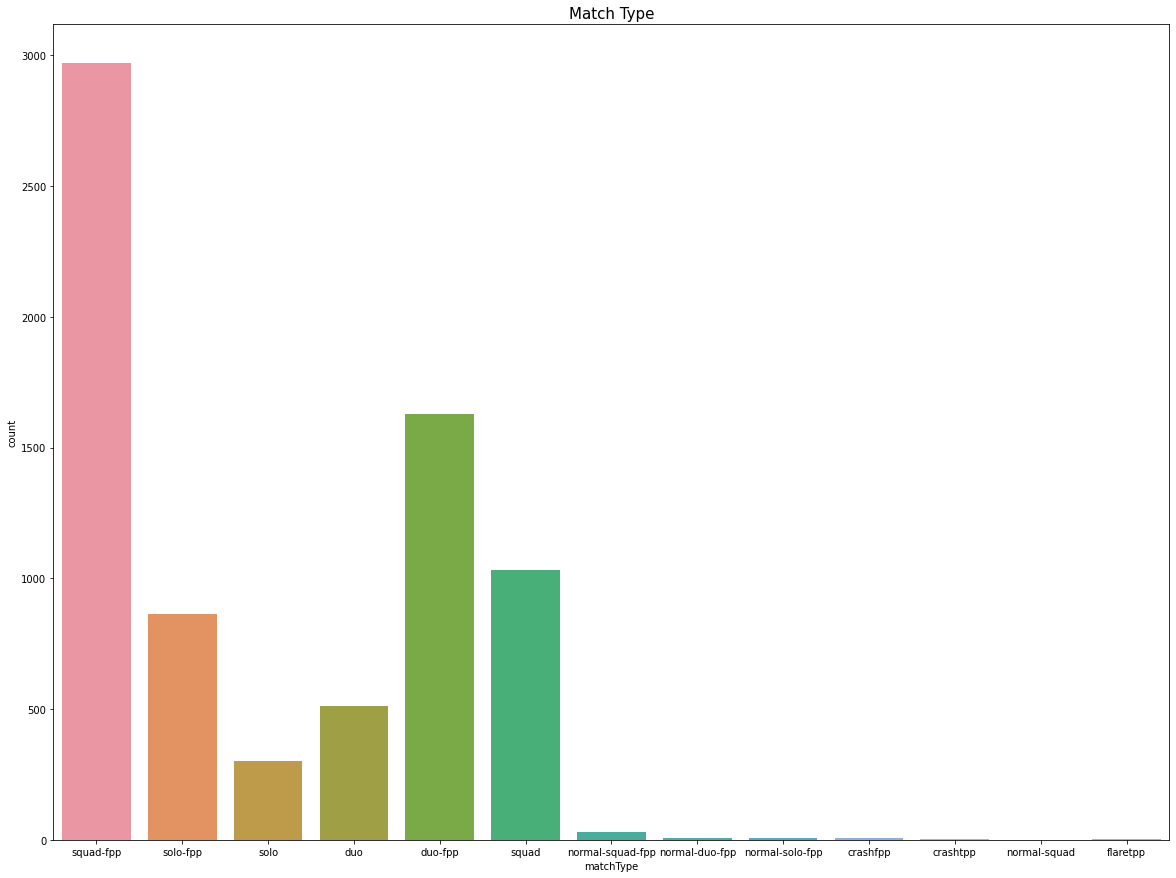

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(df['matchType'], )
plt.title('Match Type',fontsize=15)

#### From the above graph the most played match type is __Squad fpp__  
#### The least played is __Normal-squad__

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


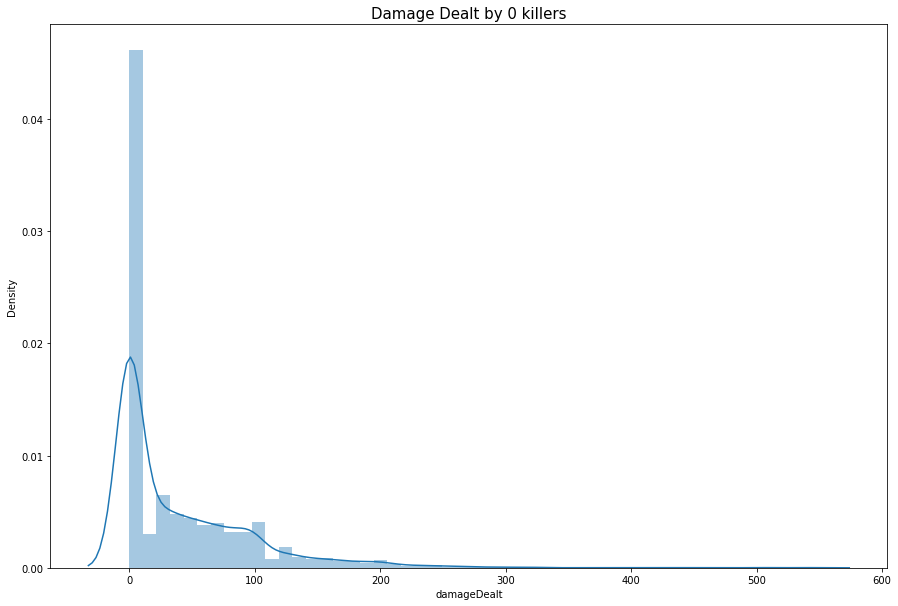

In [ ]:
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])

#### we have seen that there are lot of people with zero kills and they may do some damage to their enemies this distribution shows hte damage done by hte players with no kills,   
- We cn conclude that the players with zero kills are contributed something towards the game

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


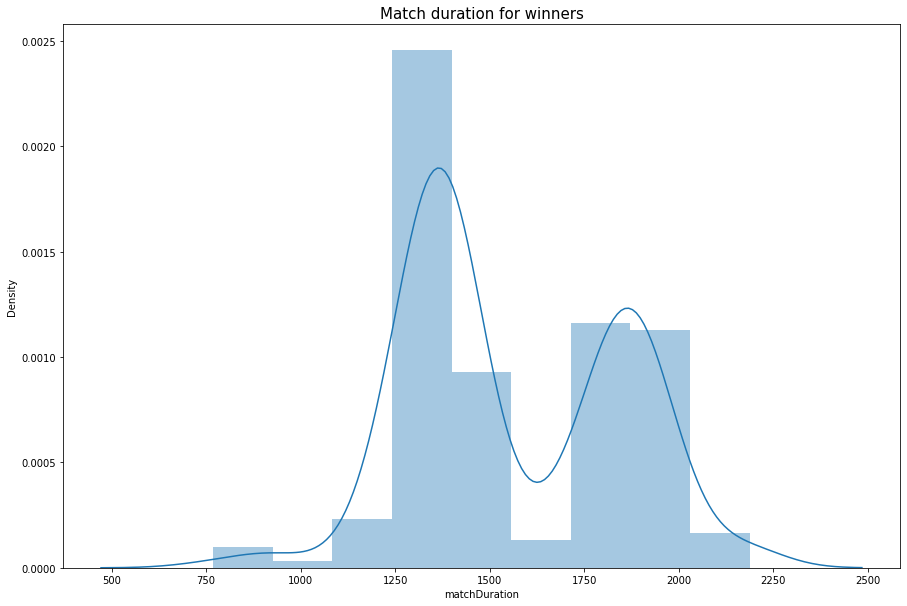

In [ ]:
data = df[df['winPlacePerc'] == 1]

plt.figure(figsize=(15,10))
plt.title('Match duration for winners',fontsize=15)
sns.distplot(data['matchDuration'])

#### The above distribution shows the duration of the match made by the all the winners  
#### From the above graph we can conclude that match duration is not a criteria to win the game even with less duration many players won the game

## Bivariate Analysis  
Bivariate analysis involves checking hte relationship between two variables simultaneously  
  
  

Text(0, 0.5, 'Kills')

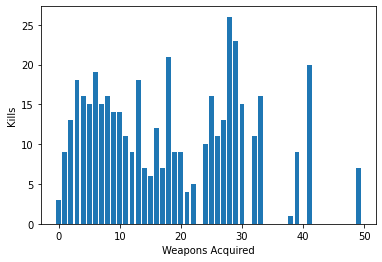

In [ ]:
plt.bar(df['weaponsAcquired'],df['kills'])
plt.xlabel('Weapons Acquired')
plt.ylabel('Kills')

#### The above bar graphs shows the relation between weapons acquired and no of kills done,we can conclude that we dont need many weapons to get higher number of kills and it depends how you utilize the weapons

Text(0.5, 1.0, 'ride distance vs win points')

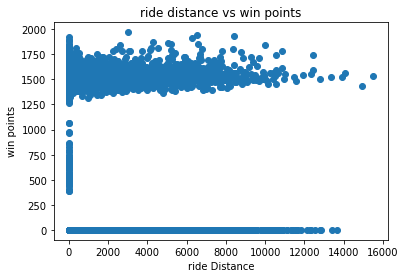

In [ ]:
 plt.scatter(df["rideDistance"],df['winPoints'])
plt.xlabel('ride Distance')
plt.ylabel('win points')
plt.title('ride distance vs win points')

In [ ]:
### The above graph shows as the distance increases in x axis the winning points are decreased, Hence if you ride more in pubg game you are definitely following a bad strategy


Text(0.5, 1.0, 'swim distance vs win points')

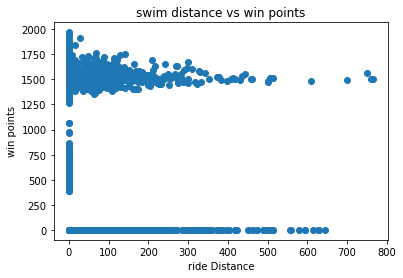

In [ ]:
plt.scatter(df["swimDistance"],df['winPoints'])
plt.xlabel('swim Distance')
plt.ylabel('win points')
plt.title('swim distance vs win points')

The above graphs shows if you choose to swim more you are not going to get wining points

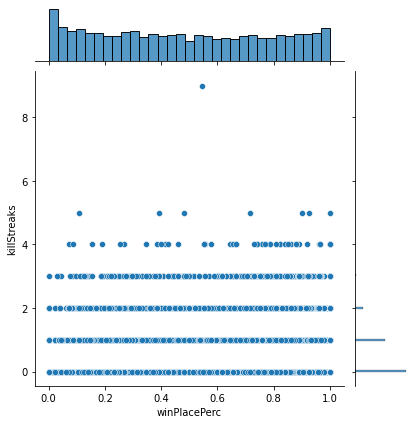

In [ ]:
sns.jointplot(x='winPlacePerc',y='killStreaks',data=df,kind='scatter')

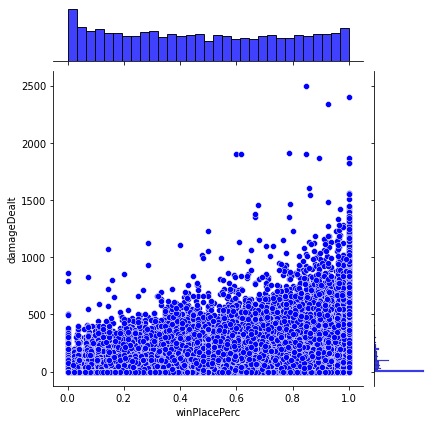

In [ ]:
sns.jointplot(x='winPlacePerc',y='damageDealt',data=df,color='b')

### There is a reasonable correlation here with the damage we deal out to enemy players and win place percentage

### Number of times a player killed a team mate¶
#### This is the number of times a team member kills one of there own team.

In [ ]:
print('The average person kills {:.4f} players on their own team'.format(df['teamKills'].mean()))
print('50% of people have killed ',df['teamKills'].quantile(0.50),' team players')
print('75% of people have killed ',df['teamKills'].quantile(0.75),' team players')
print('99% of people have killed ',df['teamKills'].quantile(0.99),' team players')
print('while the most kills recorded in the data is', df['teamKills'].max())


The average person kills 0.0249 players on their own team
50% of people have killed  0.0  team players
75% of people have killed  0.0  team players
99% of people have killed  1.0  team players
while the most kills recorded in the data is 4.0


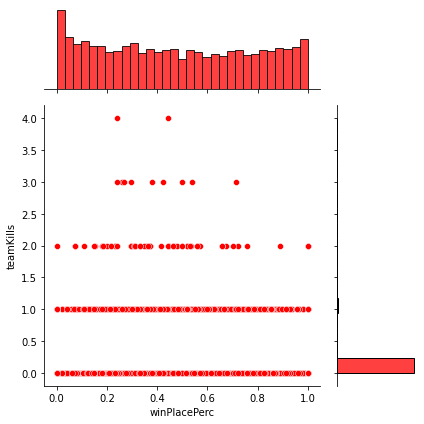

In [ ]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=df, ratio=3, color='r')

### Total distance travelled  

This is not an existing feature in the data, but we can combine the distance features to forma a total distance measure, so see if this has any predictive power of our target variable.



In [ ]:
data = df[['winPlacePerc']].copy()
data['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

print('The average person travelled {:.2f} m'.format(data['totalDistance'].mean()))
print('25% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.25)))
print('50% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.50)))
print('75% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.75)))
print('99% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.99)))
print('The longest distance travelled in the data is {:.2f} m'.format(data['totalDistance'].max()))


The average person travelled 1768.76 m
25% of people have travelled 159.00 m or less
50% of people have travelled 785.00 m or less
75% of people have travelled 2728.00 m or less
99% of people have travelled 9357.18 m or less
The longest distance travelled in the data is 16294.16 m


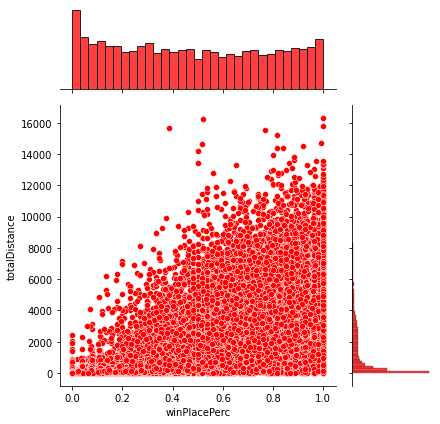

In [ ]:
sns.jointplot(x='winPlacePerc', y='totalDistance', data=data, ratio=3, color='r')

Obvservation:  

There is a reasonably strong correlation with the total distance travelled and winning, although most of this correlation may just be due to the strong correlation with walking distance and winPlacePerc. However, one interesting item to note is that it looks like the person that travelled the longest distance didn't win, when they travelled over 41 kms in a single match.


### Healing and using Boosts affect on the result  

Healing items are used to heal yourself after you've been injured, which improves your health and allows you to continue palying the game for longer
Boost items are used by a player to increase speed and accuracy, which will allow a player to achieve more kills with weapons or get away from a fight faster

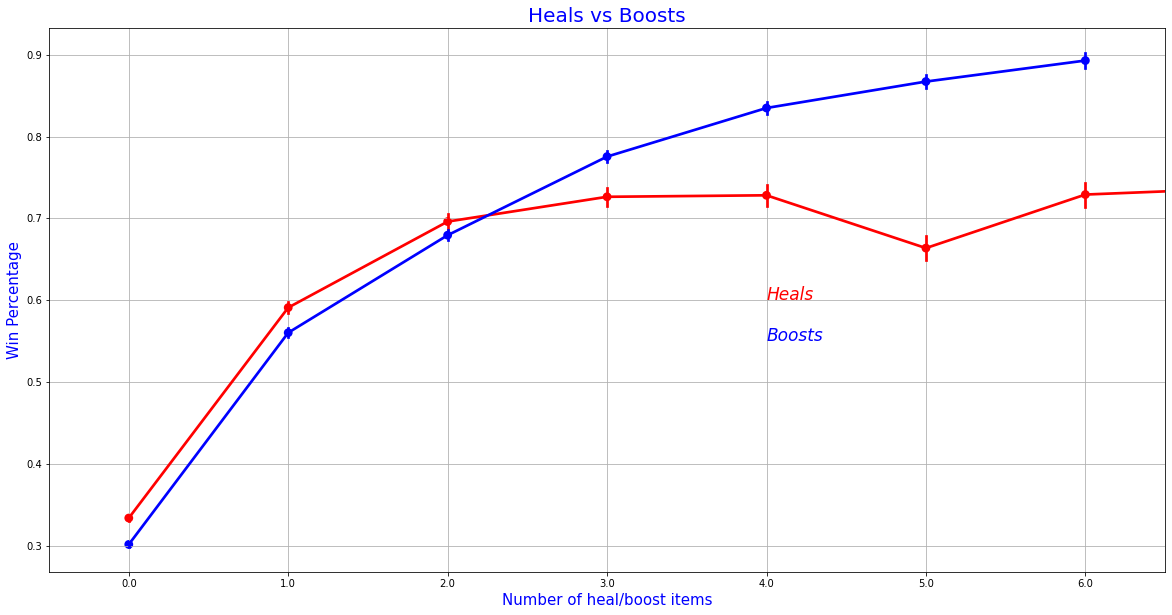

In [ ]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=1.0)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()


Observations:  

Here we can see how the heal items and boost items ae used compared to each other.  
This seems to indicate that using a few healing items increases your chance of winning, but you need to use more boosts to actaully achieve a change of winning

### Damagedealt :
Damagedealt means how much player is damaging enemy to kill/knock down.In solo it is called kill and in squad or duomode called knocked down,more damage gives more kills.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

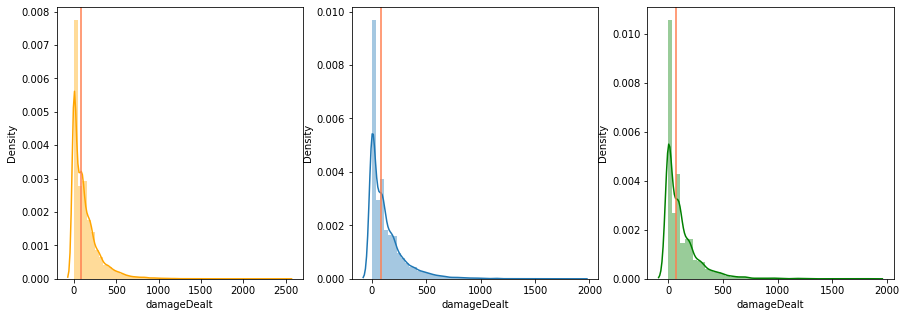

In Squad mode to get 1 kill, player has to give  89.46  damage to enemy 
In duo mode to get 1 kill, player has to give  83.86  damage to enemy 
In solo mode to get 1 kill, player has to give  75.96  damage to enemy 


In [ ]:
pubg=df
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
Squad=pubg[(pubg["matchType"]=="squad")|(pubg["matchType"]=="normal-squad-fpp")|(pubg["matchType"]=="normal-squad")|(pubg["matchType"]=="squad-fpp")]
sns.distplot(Squad["damageDealt"],color="orange")
plt.axvline(Squad["damageDealt"].median(), color='coral', label='Median')
squad_avg_damage=Squad["damageDealt"].median()

plt.subplot(1,3,2)
duo=pubg[(pubg["matchType"]=="duo")|(pubg["matchType"]=="normal-duo-fpp")|(pubg["matchType"]=="duo-squad")|(pubg["matchType"]=="duo-fpp")]
sns.distplot(duo["damageDealt"])
plt.axvline(duo["damageDealt"].median(), color='coral', label='Median')
duo_avg_damage=duo["damageDealt"].median()

plt.subplot(1,3,3)
solo=pubg[(pubg["matchType"]=="solo")|(pubg["matchType"]=="normal-solo-fpp")|(pubg["matchType"]=="solo-squad")|(pubg["matchType"]=="solo-fpp")]
sns.distplot(solo["damageDealt"],color="green")
plt.axvline(solo["damageDealt"].median(), color='coral', label='Median')
solo_avg_damage=solo["damageDealt"].median()

plt.show()

print(f"In Squad mode to get 1 kill, player has to give  {squad_avg_damage}  damage to enemy ")
print(f"In duo mode to get 1 kill, player has to give  {duo_avg_damage}  damage to enemy ")
print(f"In solo mode to get 1 kill, player has to give  {solo_avg_damage}  damage to enemy ")


### Down But Not Out:  

In this case player gets damage by enemy but player couldnt get killed in duo or squad mode player can be surive if he get healed by team-mates , when in solo mode player is died.This happens when player gets more damage and Health percentage is zero

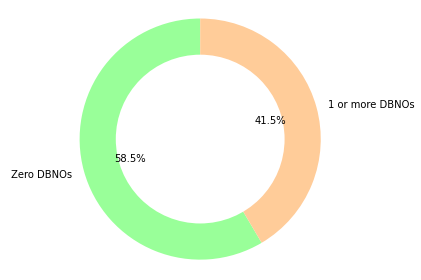

41.5% are faced Down But Not Outs while damaging the enemy 


In [ ]:
labels = ['Zero DBNOs','1 or more DBNOs']
Duo_DBNOs=list(pubg.value_counts(duo["DBNOs"]>0))
fig1, ax1 = plt.subplots()
ax1.pie(Duo_DBNOs, labels=labels, autopct='%1.1f%%', startangle=90,colors = ['#99ff99','#ffcc99'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("41.5% are faced Down But Not Outs while damaging the enemy ")


In [ ]:
squad_DBNOs=list(pubg.value_counts(Squad["DBNOs"]>0))

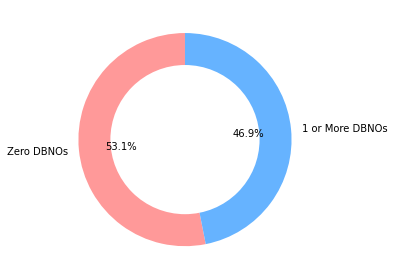

46.8% are faced Down But Not Outs while damaging the enemy


In [ ]:
labels=["Zero DBNOs","1 or More DBNOs"]
fig1,squad= plt.subplots()
squad.pie(squad_DBNOs,labels=labels, autopct='%1.1f%%', startangle=90,colors = ['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("46.8% are faced Down But Not Outs while damaging the enemy")


DBNOs vs DamageDealt

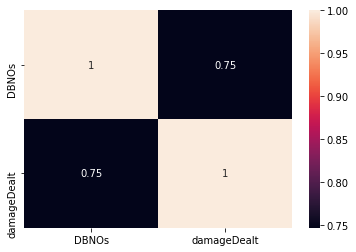

There are 74% of chances of getting damage to the player while players tries to damage enemy  


In [ ]:
sns.heatmap(pubg[["DBNOs","damageDealt"]].corr(),annot=True)
plt.show()
print("There are 74% of chances of getting damage to the player while players tries to damage enemy  ")


### Headshots  

Enemies head shoots by a opponent player during the Battle


In [ ]:
headshots=pubg.value_counts(pubg.headshotKills>0)

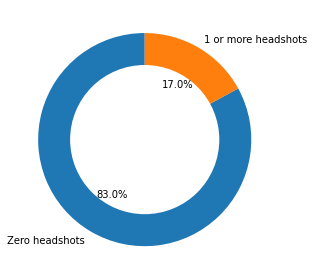

The percentage of Zero headshots is very high says that its very difficut to shoot at head


In [ ]:
labels=["Zero headshots","1 or more headshots"]
fig1,pubg_headshots= plt.subplots()
pubg_headshots.pie(headshots,labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("The percentage of Zero headshots is very high says that its very difficut to shoot at head")


### Pearson Correlation between all Features

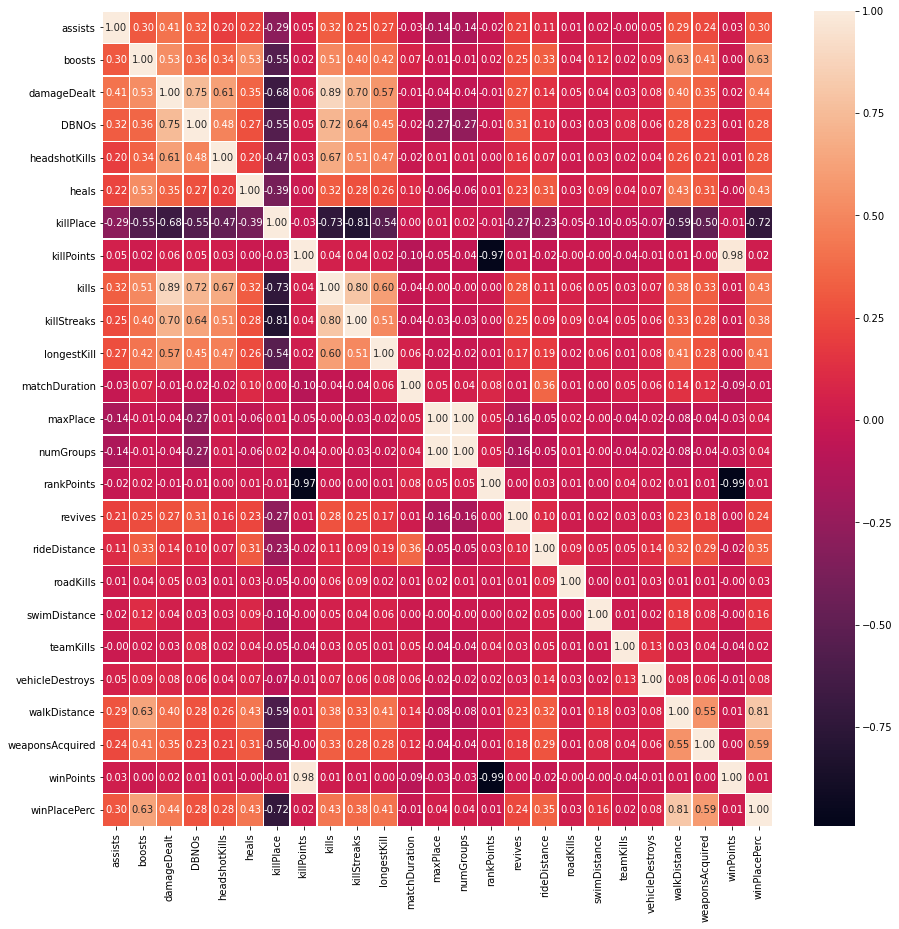

In [ ]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.2f',ax=ax)

### Observations  
- According to hte colorbar we can find the correlation between different features
- If correlation is positive one variable increases with the other  
- If correlation is negative as one varaible increases the other decreases
- If correlation is 1, it means that either the variables are same or they are almost same

## Hypothesis Testing  
H1: On an average a player plays greater than 1500 seconds in a game  
H0: On an average a player plays less than or equal to 1500 seconds in a game

In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [9]:
df['matchDuration'].isnull().sum()

1

In [13]:
df['matchDuration']=df['matchDuration'].fillna(0)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm
from scipy.stats import t

In [4]:
def tscore(sample_size,sample_mean,pop_mean,sample_std):
    nume=sample_mean-pop_mean
    denom=sample_std/(sample_size)**0.5
    return nume/denom

In [20]:
samples_=df['matchDuration'].mean()

In [7]:
type(samples)

numpy.ndarray

In [19]:
samples=df.iloc[40:60,15].values
sample_mean=np.array(samples).mean()
print("sample mean:",sample_mean)
def sample_std_(samples,sample_mean):
    summation=0
    for i in range(len(samples)):
        summation=summation+(samples[i]-sample_mean)**2
    
    return (summation/9)**0.5
sample_std=sample_std_(samples,sample_mean)
print("sample standard deviation:",sample_std)

sample mean: 1560.5
sample standard deviation: 344.4504479763542


In [16]:
confidence_level=0.95
alpha=1-confidence_level                                                                                    
t_critical=t.ppf(1-alpha/2,df=9)
print(t_critical)

2.2621571627409915


In [21]:
sample_size=20
pop_mean=samples_

In [22]:
t_=tscore(sample_size,sample_mean,pop_mean,sample_std)
print(t_)

-0.20976764924082963


Text(1560.5, 0.0007, 'x_bar')

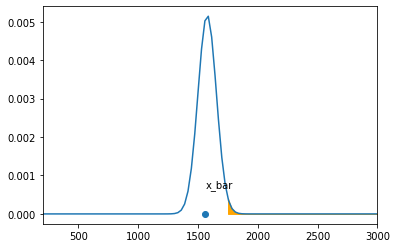

In [25]:
x_min = 200
x_max = 3000



mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x,mean,std)
plt.xlim(x_min, x_max)
plt.plot(x, y)



# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)




# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


In [24]:
if(abs(t_) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis
